In [1]:
import pylab

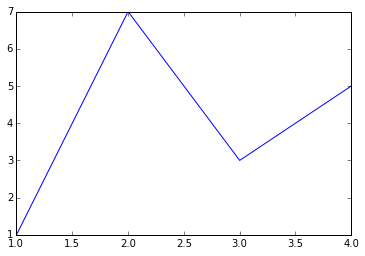

In [4]:
%matplotlib inline
pylab.figure(1) #make figure 1 the current figure
pylab.plot([1,2,3,4],[1,7,3,5])
pylab.show()

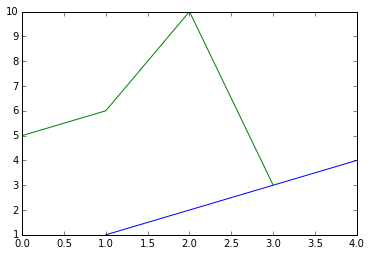

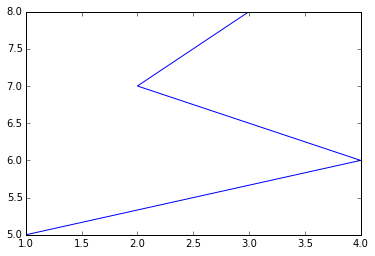

In [18]:
pylab.figure(1)
pylab.plot([1,2,3,4],[1,2,3,4])
pylab.figure(2)
pylab.plot([1,4,2,3],[5,6,7,8])
pylab.savefig('Figure-Eric') #save figure 2
pylab.figure(1) #go back to work on figure 1
pylab.plot([5,6,10,3]) #draw again on figure 1
pylab.savefig('Figure-Grimson')

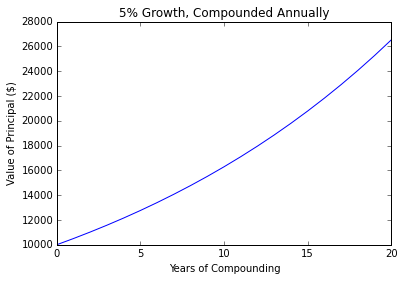

In [45]:
principal = 10000
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * interestRate
pylab.plot(range(years + 1),values)
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')
pylab.show()

### Plotting Mortgages

- objects
    - Mortgages (ADT)
        - Fixed
            - Fixed with Points
        - TwoRate

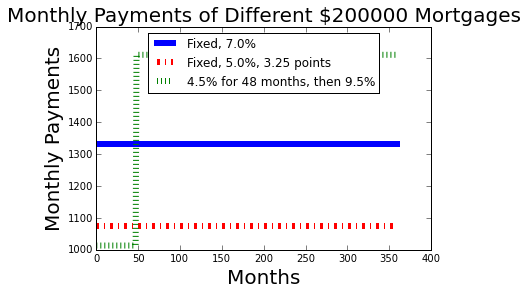

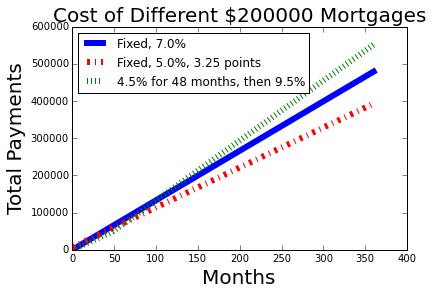

In [50]:
import pylab

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

def findPayment(loan, r, m):
    """Assumes: loan and r are floats, m an int
    Returns the monthly payment for a mortgage of size
    loan at a monthly rate of r for m months"""
    return loan*((r*(1+r)**m)/((1+r)**m - 1))

class MortgagePlots(object):
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
        
    def plotTotPd(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)

class Mortgage(MortgagePlots, object):
    """Abstract class for building different kinds of mortgages"""
    def __init__(self, loan, annRate, months):
        """Create a new mortgage"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0]
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage

    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction)

    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)

    def __str__(self):
        return self.legend

# fixed-rate mortgage
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%'

# fixed-rate mortgage with up-front points
class FixedWithPts(Fixed):
    def __init__(self, loan, r, months, pts):
        Fixed.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend += ', ' + str(pts) + ' points'

# mortgage that changes interest rate after 48 months
class TwoRate(Mortgage):
    def __init__(self,loan,r,months,teaserRate,teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100)\
            + '% for ' + str(self.teaserMonths)\
            + ' months, then ' + str(r*100) + '%'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate,
                                       self.months - \
                                       self.teaserMonths)
        Mortgage.makePayment(self)

def plotMortgages(morts, amt):
    styles = ['b-', 'r-.', 'g:']
    payments = 0 #number to identify a figure
    cost = 1 #number to identify a figure
    pylab.figure(payments)
    pylab.title('Monthly Payments of Different $' + str(amt)
                + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Monthly Payments')
    pylab.figure(cost)
    pylab.title('Cost of Different $' + str(amt) + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Total Payments')
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
    pylab.figure(payments)
    pylab.legend(loc = 'upper center')
    pylab.figure(cost)
    pylab.legend(loc = 'best')

def compareMortgages(amt, years, fixedRate, pts, ptsRate,
                    varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths,
                      varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

compareMortgages(amt=200000, years=30, fixedRate=0.07,
                 pts = 3.25, ptsRate=0.05, varRate1=0.045,
                 varRate2=0.095, varMonths=48)

pylab.show()

### L1 Problem 1

In [ ]:
def isAlphabeticalWord(word,wordList=None):
    if (len(word) > 0):
        curr = word[0]
    for letter in word:
        if (curr > letter):
            return False
        else:
            curr = letter
    if wordList is None:
        return True
    return word in wordList

### L1 Problem 2

In [5]:
def lotsOfParameters1(a,b,c,d,e):
    print a
    print b
    print c
    print d
    print e

In [6]:
lotsOfParameters1()

TypeError: lotsOfParameters1() takes exactly 5 arguments (0 given)

In [7]:
lotsOfParameters1(1,2)

TypeError: lotsOfParameters1() takes exactly 5 arguments (2 given)

In [8]:
lotsOfParameters1(1,e=5,d=4,c=3,b=2)

1
2
3
4
5


In [10]:
lotsOfParameters1(e=5,a=1,d=4,b=2,c=3)

1
2
3
4
5


In [11]:
lotsOfParameters1(a=5,b=1,c=4,d=2,3)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-11-06b0a12764d8>, line 1)

In [12]:
def lotsOfParameters2(a=1,b=2,c=3,d=4,e=5):
    print a
    print b
    print c
    print d
    print e

In [13]:
lotsOfParameters2(1,2)

1
2
3
4
5


In [14]:
lotsOfParameters2(1,c=2)

1
2
2
4
5


In [15]:
lotsOfParameters2(1,c=2,3)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-15-7e1a50458c03>, line 1)

In [16]:
lotsOfParameters2(1,e=20,b=3)

1
3
3
4
20


In [17]:
lotsOfParameters2(1,e=20,b=3,a=10)

TypeError: lotsOfParameters2() got multiple values for keyword argument 'a'

### L1 Problem 3

In [42]:
PATH_TO_FILE = './julyTemps.txt'
inFile = open(PATH_TO_FILE, 'r', 0)
lines = inFile.readlines()[6:]
highTemperatures = []
lowTemperatures = []
lines
for line in lines:
    highTemperatures.append(int(line.split()[1]))
    lowTemperatures.append(int(line.split()[2]))
print "high:", highTemperatures
print "low:", lowTemperatures

high: [91, 84, 86, 84, 83, 80, 86, 89, 84, 83, 80, 86, 90, 91, 91, 88, 97, 89, 74, 71, 74, 84, 86, 91, 83, 84, 79, 72, 73, 81, 73]
low: [70, 69, 68, 68, 70, 68, 73, 71, 67, 65, 66, 63, 69, 72, 72, 72, 76, 70, 66, 64, 61, 61, 66, 68, 65, 66, 64, 63, 64, 63, 63]


### L1 Problem 4

In [47]:
def producePlot(lowTemps, highTemps):
    diffTemps = [(high - low) for (high, low) in zip(highTemps, lowTemps)]
    pylab.plot(diffTemps)
    pylab.title('Day by Day Ranges in Temperature in Boston in July 2012')
    pylab.xlabel('Days')
    pylab.ylabel('Temperature Ranges')

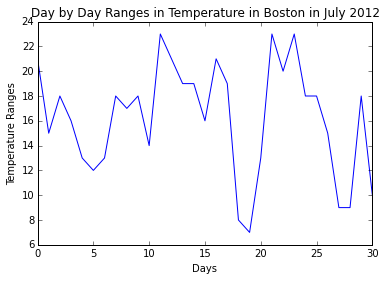

In [48]:
producePlot(lowTemperatures, highTemperatures)